<a href="https://colab.research.google.com/github/gonzo1978/CAP4453/blob/main/pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Tensor

• Similar to NumPy arrays

• They can also be used on a GPU

• Faster computation



In [ ]:
import torch

torch.manual_seed(42)

# random tensor
x=torch.rand(2,3)
y=torch.rand(3,3)

print(x)
print(y)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])
tensor([[0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411]])



• All zeros

• Directly from data

• Size of a tensor


In [ ]:
x = torch.zeros(5, 3)
print(x)
x = torch.tensor([5.5, 3])
print(x)
print(x.size())

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([5.5000, 3.0000])
torch.Size([2])




#Operations
• Adding tensors

• Indexing

In [ ]:
x = torch.randn(4, 4)
y = torch.randn(4, 4)

print(x)
print(torch.add(x, y))

print(x[:, 1])

tensor([[-0.3553, -0.9138, -0.6581,  0.0780],
        [ 0.5258, -0.4880,  1.1914, -0.8140],
        [-1.2862, -1.4032,  0.0360, -0.0635],
        [ 0.6756, -0.0978,  1.8446, -1.1845]])
tensor([[-0.8011,  0.5313,  0.1983,  2.2961],
        [ 1.0490, -0.1413,  0.9940, -1.8686],
        [-2.0580, -1.5754,  0.5598, -0.0069],
        [ 1.1019,  0.4772,  1.2029, -3.3909]])
tensor([-0.9138, -0.4880, -1.4032, -0.0978])


#Operations
• Resizing

• If you want to resize/reshape tensor

In [ ]:
x = torch.randn(4, 4)

y = x.view(16)
z = x.view(-1, 8)

print(x)
print(y)
print(z)
print(x.size(), y.size(),z.size())


tensor([[ 1.6992,  0.0109, -0.3387, -1.3407],
        [-0.5854,  0.5362,  0.5246,  1.1412],
        [ 1.4332,  0.7440, -0.4816, -1.0495],
        [ 0.6039, -1.7223, -0.8278,  1.3347]])
tensor([ 1.6992,  0.0109, -0.3387, -1.3407, -0.5854,  0.5362,  0.5246,  1.1412,
         1.4332,  0.7440, -0.4816, -1.0495,  0.6039, -1.7223, -0.8278,  1.3347])
tensor([[ 1.6992,  0.0109, -0.3387, -1.3407, -0.5854,  0.5362,  0.5246,  1.1412],
        [ 1.4332,  0.7440, -0.4816, -1.0495,  0.6039, -1.7223, -0.8278,  1.3347]])
torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


# Torch tensor vs NumPy array

• NumPy array: CPU

• Torch tensor: GPU


In [ ]:
import numpy
a = torch.ones(5)
print(a)
b = a.numpy()
print(b)

a = numpy.ones(5)
print(a)
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


# Matrix Multiplication in PyTorch

In [ ]:
mat1=torch.randn(2,3)
mat2=torch.randn(3,3)
res=torch.mm(mat1,mat2)
print(mat1)
print(mat2)
print(res)
print(res.size())

tensor([[ 0.9554, -1.0902,  2.5952],
        [ 2.7504,  0.6488,  0.4496]])
tensor([[ 0.3220, -1.0503,  0.0274],
        [-0.7916, -0.5601, -0.9977],
        [-0.9444, -0.7357, -0.3638]])
tensor([[-1.2803, -2.3020,  0.1696],
        [-0.0525, -3.5829, -0.7356]])
torch.Size([2, 3])


# Batch Matrix Multiplication in PyTorch

In [ ]:
import torch

batch1=torch.randn(10,3,4)
batch2=torch.randn(10,4,5)
res=torch.bmm(batch1,batch2)

print(res.size())

torch.Size([10, 3, 5])


# Many Tensor operations in PyTorch…

• Matrix multiplication: **torch.mm**

• Batch matrix multiplication: **torch.bmm**

• Tensor Concatenation: **torch.cat**

• Change Tensor dimensions: **torch.sqeueeze/torch.unsqueeze**

…
Check documentation at http://pytorch.org/docs/master/torch.html#tensors

# Computational Graphs

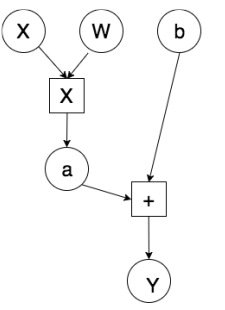

In [ ]:
import torch

# input
x = torch.ones(2,2)

# parameters
w = torch.randn(2,1,requires_grad=True)
b = torch.randn(1,requires_grad=True)

# prediction
p = torch.sigmoid(torch.mm(x, w) + b)

print('prediction is: ' + str(p))

# groundtruth
y = torch.ones(2,1)

# cross-entropy loss
loss = -y*torch.log(p)-(1-y)*torch.log(1-p)
print(loss)

# the cost to minimize
cost = loss.mean()
print(cost)

prediction is: tensor([[0.8229],
        [0.8229]], grad_fn=<SigmoidBackward0>)
tensor([[0.1949],
        [0.1949]], grad_fn=<SubBackward0>)
tensor(0.1949, grad_fn=<MeanBackward0>)
prediction is: tensor([[0.9083],
        [0.9083]], grad_fn=<SigmoidBackward0>)
tensor([[0.0962],
        [0.0962]], grad_fn=<SubBackward0>)
tensor(0.0962, grad_fn=<MeanBackward0>)


# Automatic Gradient Computation

In [ ]:
p = torch.sigmoid(torch.mm(x, w) + b)
loss = -y*torch.log(p)-(1-y)*torch.log(1-p)
cost = loss.mean()
print('loss mean: ' + str(cost))

# compute the backward pass
cost.backward()
print('cost backward: ' + str(cost))

print(w.grad)
print(b.grad)

loss mean: tensor(0.0962, grad_fn=<MeanBackward0>)
cost backward: tensor(0.0962, grad_fn=<MeanBackward0>)
tensor([[-0.0917],
        [-0.0917]])
tensor([-0.0917])


#Training procedure
• Define the neural network

• Iterate over a dataset of inputs

• Process input through the network

• Compute the loss

• Propagate gradients back into the network’s parameters

• Update the weights of the network

## 1. Build Neural Networks using PyTorch

Neural networks can be constructed using the torch.nn package.

**Forward**


• An nn.Module contains layers, and

• A method forward(input) that returns the output

• You can use any of the Tensor operations in the forward function

<br>

**Backward**

• nn depends on autograd

• You just have to define the forward function

In [ ]:
# Define a Network Class

# You don’t need to define a backward function!

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net, self).__init__()
    # create layers
    # an affine operation: y = Wx + b
    self.flatten = nn.Flatten()
    self.fc1 = nn.Linear(28*28, 120)  # 28*28 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
  # define feed-forward function
    x = self.flatten(x)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# 2. Iterate over a dataset of inputs

## Loading data - torchvision

**Torchvision**

• it’s extremely easy to load existing datasets.



In [ ]:
import torchvision
import torchvision.transforms as transforms

# check https://pytorch.org/vision/stable/transforms.html

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5), (0.5))])
# torchvision.transforms.Normalize(mean, std, inplace=False
# Nomalize a tensor image writh mean and standard deviation. Given mean: (mean[1],...,mean[n]) and std: (std[1],..,std[n]) for n channels, this transform will normalize each channel of the input torch.*Tensor i.e., output[channel] = (input[channel] - mean[channel]) / std[channel]

trainset = torchvision.datasets.MNIST(root='./data',train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# 3. Process input through the network

It was defined in the forward method



# 4. Compute the loss

**Loss function**

• A loss function takes the (output, target) pair of inputs

• Computes a value that estimates how far away the output is from the
target.

• There are several different loss functions under the nnpackage.

• A simple loss can be **nn.MSELoss** : It computes the mean-squared error between the input and the target.



```
output = net(input)
target = torch.randn(10)  

# a dummy target, for example
target = target.view(1, -1)  

# make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
```



# 5. Propagate gradients back into the network’s parameters



```
output = net(input)

loss = criterion(output, target)

loss.backward()
```



# 6. Update the weights of the network




```
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update
```




# Training example



In [ ]:
import torch.optim as optim
net = Net()

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):    # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):     # training code for each batch
    # get the inputs;
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999: # every 2000 batches
      print('[%d, %5d] loss: %.3f' % (epoch+1,i+1,running_loss/2000.0))
      running_loss = 0.0

print('Finished Training')
PATH = './mnist_net.pth'
torch.save(net.state_dict(), PATH)


[1,  2000] loss: 0.834
[1,  4000] loss: 0.389
[1,  6000] loss: 0.316
[1,  8000] loss: 0.270
[1, 10000] loss: 0.240
[1, 12000] loss: 0.228
[1, 14000] loss: 0.207
[2,  2000] loss: 0.165
[2,  4000] loss: 0.153
[2,  6000] loss: 0.157
[2,  8000] loss: 0.154
[2, 10000] loss: 0.154
[2, 12000] loss: 0.135
[2, 14000] loss: 0.152
Finished Training


# Testing

torch.Size([1, 1, 28, 28])
Predicted label:  tensor([4])
Groundtruth label:  tensor([4])


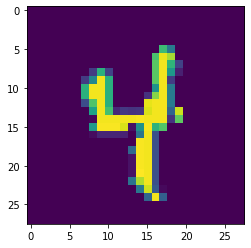

In [ ]:
import matplotlib.pyplot as plt
import numpy

testset = torchvision.datasets.MNIST(root='./data',train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True, num_workers=2)

dataiter = iter(testloader)
images, labels = dataiter.next()

net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print(images.size())
test_img = images.numpy().astype(numpy.float64)
test_img = test_img.reshape((28,28))
test_img = 255 * test_img
test_img = test_img.astype(numpy.uint8)
plt.imshow(test_img)

print('Predicted label: ', str(predicted))
print('Groundtruth label: ', str(labels))